## Mall Customer Segmentation

Steps to solve the problem:
- Importing Libraries.
- Data Exploration.
- Data Visualization.
- Clustering using K-Means.
    - Choosing cluster k
    - Ploting the Cluster
    
Dataset Source: Kaggle "Mall Customer Segmentation"

**Import Libraries**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

**Data Explore**

In [4]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Data Visualization**

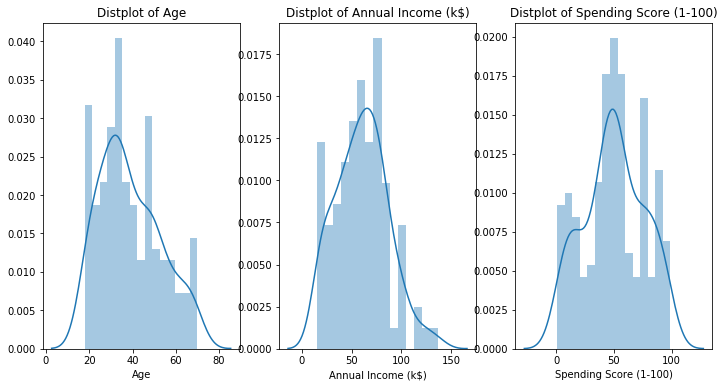

In [16]:
plt.figure(1,figsize=(12,6))

n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n +=1
    plt.subplot(1,3,n)
    sns.distplot(df[x],bins=15)
    plt.title('Distplot of {}'.format(x))
plt.show()

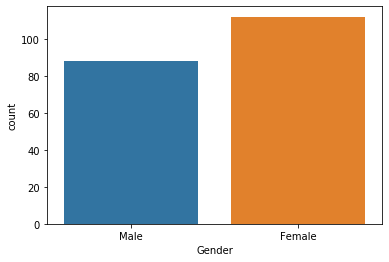

In [18]:
sns.countplot(df['Gender'])

*Check for relationship among each parameters*

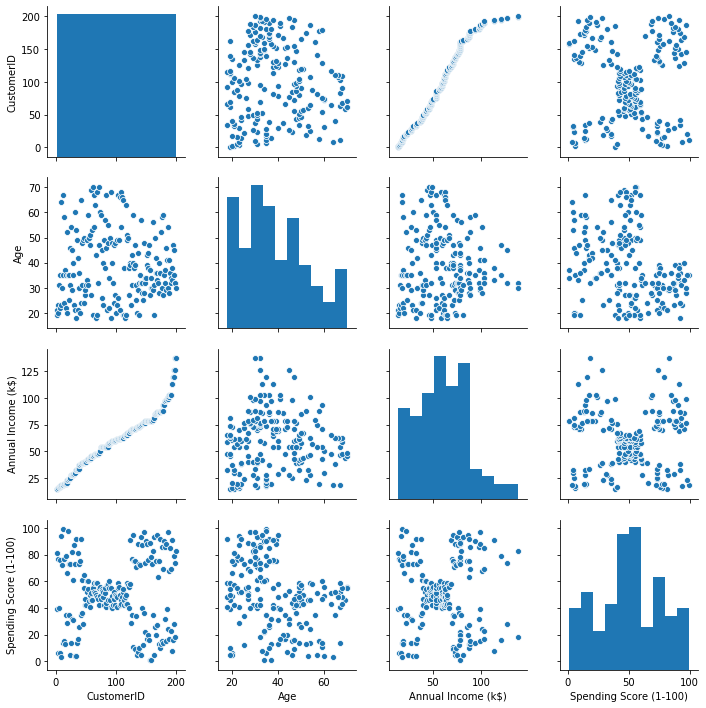

In [24]:
sns.pairplot(data=df)

*Insights based on above pairplot:
- Ages in 20-40 customers on average have higher spending score than >40 ages group
- High annual income doesn't mean high spending score
- Even with same annual income, customers' spending score varies


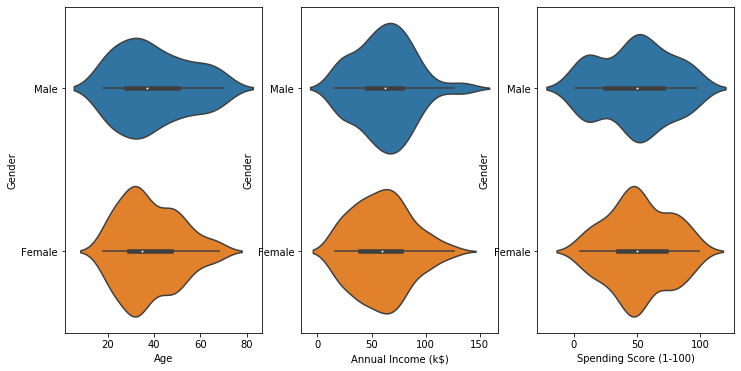

In [27]:
plt.figure(1,figsize=(12,6))

n=0
for m in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n +=1
    plt.subplot(1,3,n)
    sns.violinplot(x=m,y='Gender',data=df)
    
plt.show()

*Per the Violinplot, there is no interesting trend showing Gender is a key segment factor.*

**Clustering using K-Means**

*Customer segmentation mainly focus on customers spending behavior, thus Spending Score is the key parameter to be included in our model. Per the relationship of each parameters, Age and Annual Income are showing interesting pattern associated with Spending Score. So let's try using Age & Spending Score and Annual Income & Spending Score for customer segmentation and see what we could find out.*

*1.Age & Spending Score as Segmentation Parameters*

In [33]:
X = df[['Age','Spending Score (1-100)']].iloc[:,:].values

In [36]:
from scipy.spatial.distance import cdist

In [42]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,10)

for k in K:
    #Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

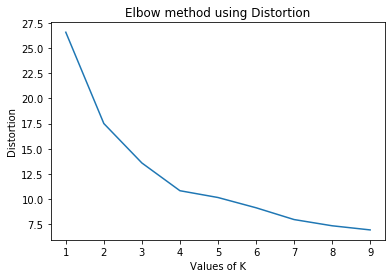

In [47]:
plt.plot(K,distortions)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow method using Distortion')
plt.show()

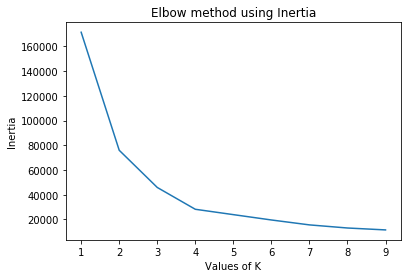

In [50]:
plt.plot(K,inertias)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow method using Inertia')
plt.show()

*Using Elbow method to determine the optimal number of clusters -> the optimal number of clusters for this data is 4-7, depending how complicate we want to segment customers*

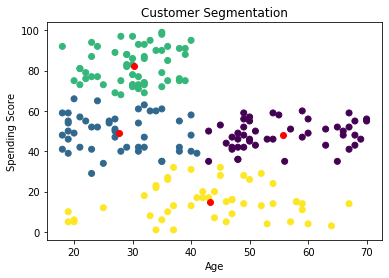

In [64]:
Segment = KMeans(n_clusters=4)
Segment.fit(X)

center=Segment.cluster_centers_

plt.scatter(x='Age',y='Spending Score (1-100)',data=df,c=Segment.labels_)
plt.scatter(x=center[:,0],y=center[:,1],c='red',alpha=1)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.show()

*2.Annual Income & Spending Score*

In [69]:
X = df[['Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,10)

for k in K:
    #Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

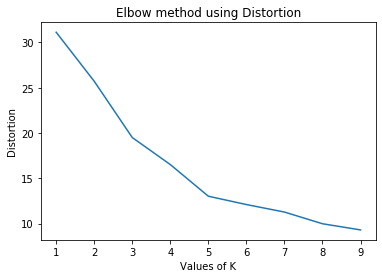

In [70]:
plt.plot(K,distortions)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow method using Distortion')
plt.show()

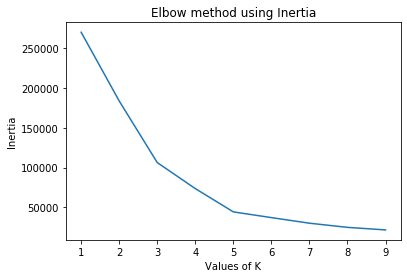

In [71]:
plt.plot(K,inertias)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow method using Inertia')
plt.show()

*Using Elbow method to determine the optimal number of clusters -> the optimal number of clusters for this data is 5-7, depending how complicate we want to segment customers*

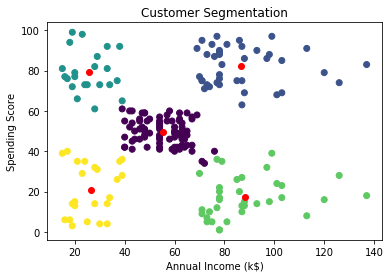

In [72]:
Segment = KMeans(n_clusters=5)
Segment.fit(X)

center=Segment.cluster_centers_

plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,c=Segment.labels_)
plt.scatter(x=center[:,0],y=center[:,1],c='red',alpha=1)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.show()

*3.Age & Annual Income & Spending Scpre*

In [74]:
X = df[['Age','Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,10)

for k in K:
    #Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    
    distortions.append(sum(np.min(cdist(X,kmeanModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

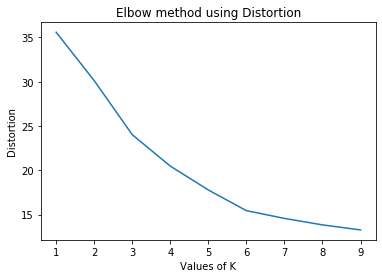

In [75]:
plt.plot(K,distortions)
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow method using Distortion')
plt.show()

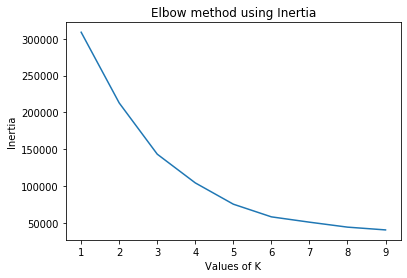

In [76]:
plt.plot(K,inertias)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow method using Inertia')
plt.show()

*Using Elbow method to determine the optimal number of clusters -> the optimal number of clusters for this data is 6, depending how complicate we want to segment customers*

In [78]:
Segment = KMeans(n_clusters=5)
Segment.fit(X)

center=Segment.cluster_centers_
labels=Segment.labels_


In [80]:
df['Segment']=labels
df

In [95]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Segment
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3
